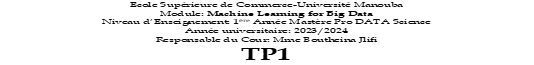


<h1 align="center"> Réseaux de Neurones </h1>

<p style ="font-size:15px">Ce projet a pour but de présenter les réseaux de neurones et leurs construction avec Python.</p>

<h3 style ="color:blue">Table des matières : </h3>


<h4><ol>
<li>Présentation succincte des réseaux de neurones</li> <br>

<li>Implémentation d’un Perceptron et d'un PMC avec Python, TensorFlow et Keras</li><br>
<li>Implémentation d’autres classifieurs avec Python, comparaison entre modèles</li><br>

<li>Conclusion</li> </ol></h4>

<h2> <u> 1. Présentation succincte des réseaux de neurones </u></h2>
<h3> <u> A. Fonctionnement d’un réseau de neurone </u></h3>

<p style ="font-size:15px"> Un réseau de neurones artificiels  est un système dont la conception est à l'origine inspirée du fonctionnement des neurones biologiques, et qui par la suite s'est rapproché des méthodes statistiques. En machine Learning les réseaux de neurones permettent de faire de l'apprentissage supervisé, non supervisé et par renforcement.
<br>
<br>Un neurone artificiel ou perceptron est un objet associé à un état d’activation qui varie au cours du temps, une fonction d’entrée et une fonction d’activation. Un réseau de neurones est un système dynamique oû les neurones sont liés entre eux.<br> </p>

<p style ="font-size:15px"> Considérons un réseau à N neurones, il contient :<br> <br>
    - <u> Une matrice des poids </u>:  $W$  de taille $NxN$ ou les coefficients $(i,j)$ de celle-ci sont les poids reliant un neurones $i$ à $j$.<br> <br></p>
    
<p style ="font-size:15px">   - <u> Un vecteur d'activation </u>:  $a=(a_1,..,a_n)$ ou $a_i$ correspond à l’état d’activation du neurone numéro i à chaque instant.<br> <br></p>
    
<p style ="font-size:15px">   - <u>Une fonction d’entrée </u>: la fonction d’entrée du neurone $i$ notée $h_i$ utilise la matrice des poids $W$ pour agréger les informations qui sont transmises au neurone $i$, par informations on désigne les états d’activation des neurones qui lui sont connectés. En général on à  : <br>
$$ h_i(W,a) = W_ia = \sum_{i=1}^{n} W_{i,j}a_i$$ <br></p>

<p style ="font-size:15px">On note aussi le vecteur des activations pondérées : $e_i(t)=h_i(W,a(t))$</p>


<p style ="font-size:15px"> - <u> La fonction d'activation </u>: la fonction d’activation notée $f_i$ permet de calculer les nouveaux états d’activation à partir des activations pondérées : $a_i(t+1) = f_i(e_i(t))$ <br> <br>
Elle possède les propriétés de monotonie, de seuillage, de saturation (pour un seuil $\theta_i$) et de dérivabilité. En voici quelques exemples, la fonction linéaire bornée, la fonction sigmoïde exponentielle, la fonction sigmoïde tangentielle.</p>     






<h3> <u> B. Fonctionnement de l’apprentissage </u></h3>

<p style ="font-size:15px"> L'apprentissage d'un réseau de neurone se fait essentiellement à partir de la modification des poids (de la matrice $W$) dans le cadre d'apprentissage supervisé. En effet cela revient à minimiser une fonction $F$ qui doit être une fonction de Lyapunov du système dynamique (du réseau de neurones).
<br></p>

<p style ="font-size:15px">Soient $x=(x_1,..,x_n)$ le vecteur des observations et $y=(y_1,..,y_n)$ le vecteur des données de sorties. Le but est de modifier $W$ en fonction de $x$ et $y$. En effet si $F$ satisfait la relation  $ \frac{\partial W}{\partial t} = - \nabla F$ alors on à $ F^{'}(t)\leq \nabla F$  et donc  $\frac{\partial W}{\partial t}\geq \lvert-\nabla F \rvert^2 \leq 0$,  ce qui montre une décroissance le long du système dynamique.</p>

<br>

<p style ="font-size:15px"> Soit $E$ la fonction d'erreur, par la règle Delta et la descente de gradient, on peut obtenir un minimum local de E donné par la relation suivante $ \nabla W = W(t+1)-W(t)= -\lambda \frac{\partial E}{\partial W} $, $\lambda $ est le pas d'apprentissage c'est un hyperparamètre.<br>
 Souvent on utilise la fonction d'erreur quadratique donnée par $E(y,s) = \frac {1}{2} \sum_{i=1}^n (y_i-s_i)^2 $ où $s=(s_1,..,s_n)$ est le vecteur de sortie renvoyé par notre réseau.</p>
<br>   

<h2> <u>2. Implémentation d’un Perceptron Multi Couches (PMC) avec Python (TensorFlow et Keras) </u></h2>

<p style ="font-size:18px"> On s'intéresse à la prédiction d'AVC ( Accident Cardio-Vasculaire) à l'aide d'un réseau de neurones en python. Dans un premier temps on importe les données et on les visualise.</p>


In [2]:
import pandas as pd
data=pd.read_csv('/content/healthcare-dataset-stroke-data.xls')

data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [3]:
import warnings
warnings.filterwarnings('ignore')

**Activité1**:



1.   Explorez le dataset : taille, informations sur les variables indépendantes et les variables dépendantes
2.   Effectuez une AED

In [4]:
# shape of the data
data.shape

(5110, 12)

In [47]:
#data information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [48]:
# describing the data
data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [49]:
# Use describe for categorical columns
categorical_description = data.describe(include=['object'])
print(categorical_description)

        gender ever_married work_type Residence_type smoking_status
count     5110         5110      5110           5110           5110
unique       3            2         5              2              4
top     Female          Yes   Private          Urban   never smoked
freq      2994         3353      2925           2596           1892


# **Univariate Analysis**

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="ticks", color_codes=True)

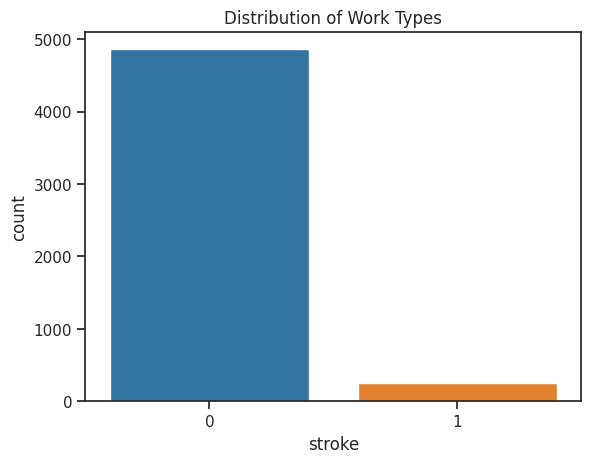

In [51]:
# Define color palette
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2']

# Create countplot with custom colors
sns.countplot(x='stroke', data=data, palette=colors)

plt.title('Distribution of Work Types')

# Show plot
plt.show()

**Umbalanced Dataset**

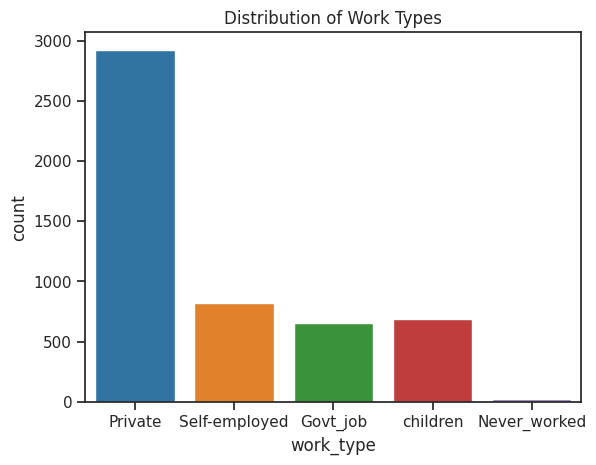

In [52]:
# Define color palette
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2']

# Create countplot with custom colors
sns.countplot(x='work_type', data=data, palette=colors)

plt.title('Distribution of Work Types')

# Show plot
plt.show()

Highest value is for people working in the private sector

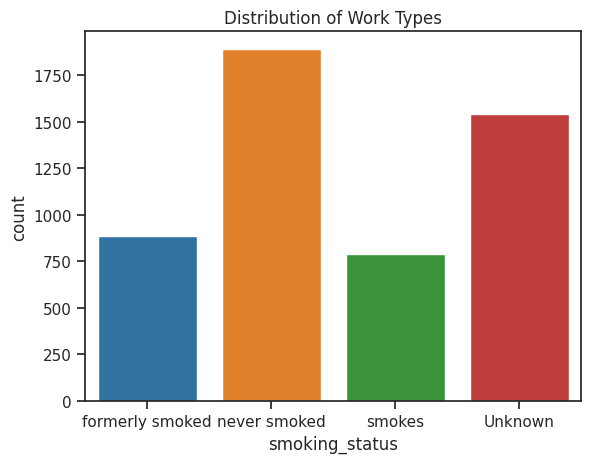

In [10]:
# Define color palette
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2']

# Create countplot with custom colors
sns.countplot(x='smoking_status', data=data, palette=colors)

plt.title('Distribution of Work Types')

# Show plot
plt.show()

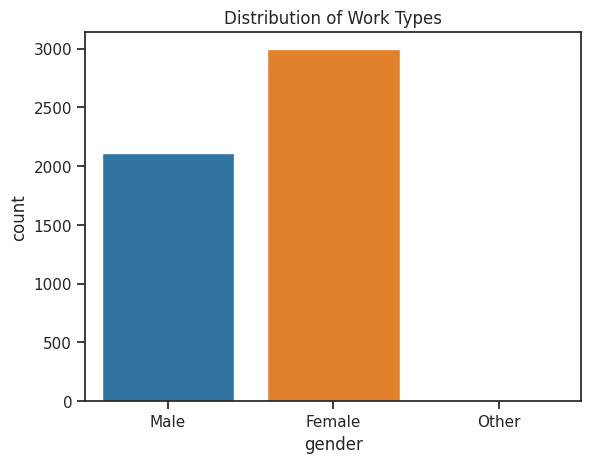

In [11]:
# Define color palette
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2']

# Create countplot with custom colors
sns.countplot(x='gender', data=data, palette=colors)

plt.title('Distribution of Work Types')

# Show plot
plt.show()

We have more females than males in the dataset

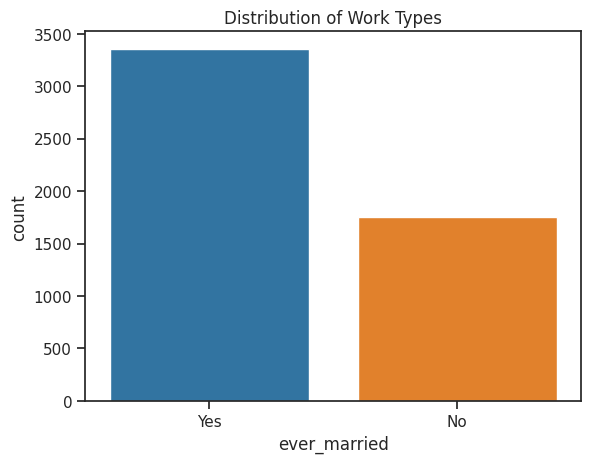

In [12]:
# Define color palette
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2']

# Create countplot with custom colors
sns.countplot(x='ever_married', data=data, palette=colors)

plt.title('Distribution of Work Types')

# Show plot
plt.show()

We have more married people than singles in the dataset

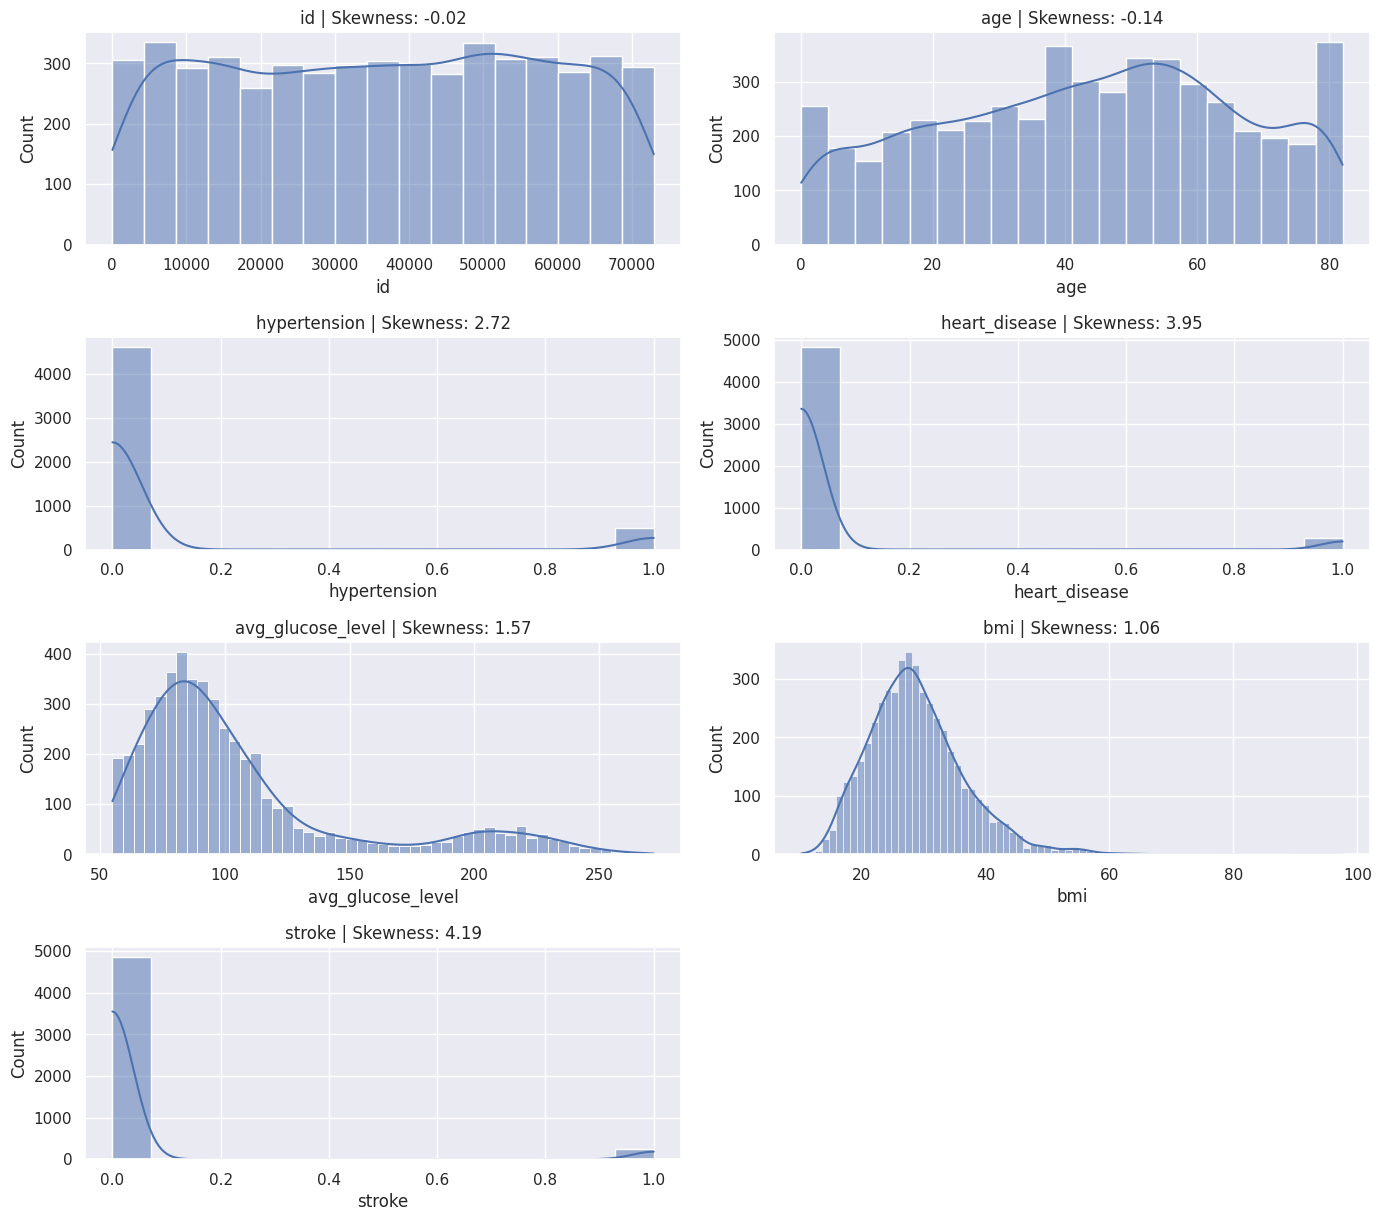

In [13]:
# Set Seaborn style
sns.set_style("darkgrid")

# Identify numerical columns
numerical_columns = data.select_dtypes(include=["int64", "float64"]).columns

# Plot distribution of each numerical feature
plt.figure(figsize=(14, len(numerical_columns) * 3))
for idx, feature in enumerate(numerical_columns, 1):
    plt.subplot(len(numerical_columns), 2, idx)
    sns.histplot(data[feature], kde=True)
    plt.title(f"{feature} | Skewness: {round(data[feature].skew(), 2)}")

# Adjust layout and show plots
plt.tight_layout()
plt.show()

# **Bivariate Analysis**

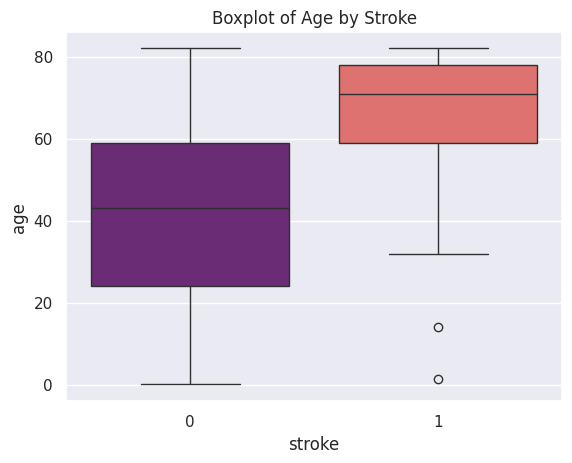

In [14]:
# Boxplot: Shows the distribution of numerical data across different categories
sns.boxplot(x='stroke', y='age', data=data, palette='magma')
plt.title('Boxplot of Age by Stroke')
plt.show()

Older individuals have higher chance of getting a stroke

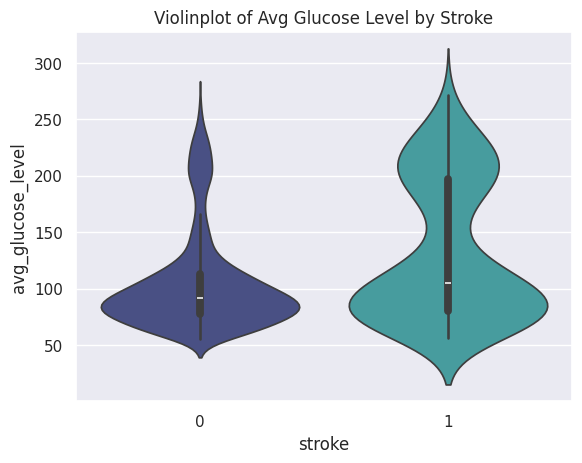

In [15]:
# Violinplot: Similar to a box plot, but also shows the probability density of the data
sns.violinplot(x='stroke', y='avg_glucose_level', data=data, palette='mako')
plt.title('Violinplot of Avg Glucose Level by Stroke')
plt.show()

* for individuals without history of a stroke: the data is distributed around 90 for avg_glucose_level
* for individuals with history of a stroke: the data is distributed around 90 for avg_glucose_level and there's another distribution around 210




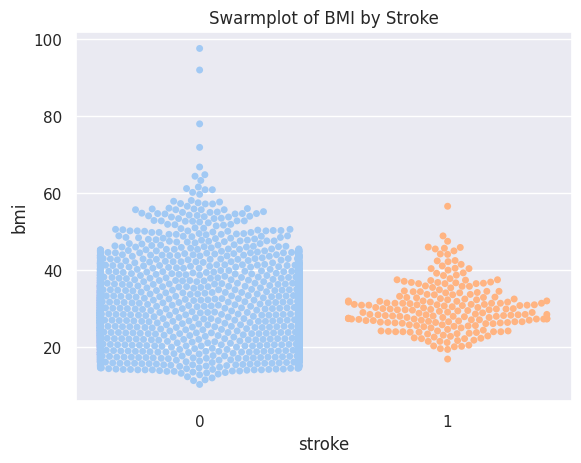

In [16]:
# Swarmplot: Show each data point as a dot, useful for small datasets
sns.swarmplot(x='stroke', y='bmi', data=data, palette='pastel')
plt.title('Swarmplot of BMI by Stroke')
plt.show()

stoke 0: values are distributed around 15-45 bmi
Stroke 1: values are distributed around 30 bmi

PS: beware that the dataset is imbalanced

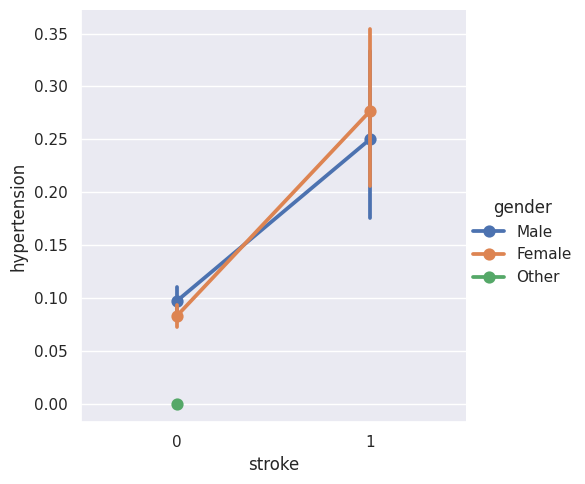

In [17]:
sns.catplot(data=data, x="stroke", y="hypertension", hue="gender", kind="point")


* individuals with 0 stroke, have an average of 0.1 hypertension, both male and female are similar
* As for individuals with 1 stroke, they an avg. of 0.26 , females a bit higher

=> we can see that there's a correlation between hypertension and stroke


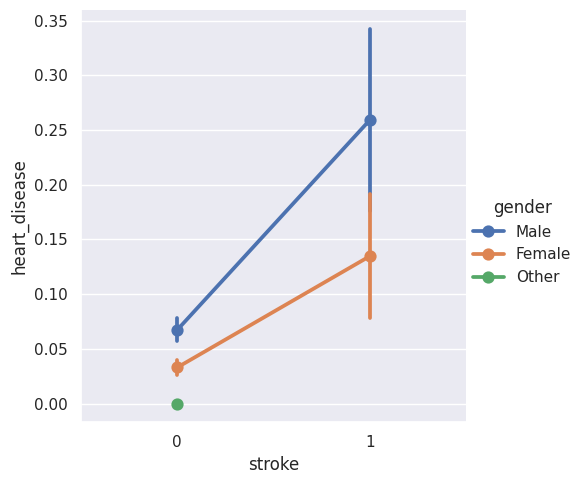

In [18]:
sns.catplot(data=data, x="stroke", y="heart_disease", hue="gender", kind="point")


* individuals with 0 stroke, have an average of 0.5 heart_desease, males slightly higher than females
* As for individuals with 1 stroke, they an avg. of 0.2 , males are much higher tahn females

=> we can see that there's a correlation between heart_desease and stroke


In [5]:
import plotly.express as px
# 3D Scatter Plot
fig = px.scatter_3d(data, x='age', y='avg_glucose_level', z='bmi', color='stroke',
                    labels={'age': 'Age', 'avg_glucose_level': 'Avg Glucose Level', 'bmi': 'BMI'},
                    title='3D Scatter Plot of Stroke Dataset')
fig.show()


In [20]:
import scipy.stats as stats
import statsmodels.api as sm

In [107]:
# 1. Chi-square Test (Gender vs. Stroke)
observed = pd.crosstab(data['gender'], data['stroke'])
chi2, p, dof, expected = stats.chi2_contingency(observed)
print("Chi-square Test (Gender vs. Stroke):")
print("Chi-square value:", chi2)
print("p-value:", p)

# 2. T-test (Age by Stroke)
t_statistic, p_value = stats.ttest_ind(data[data['stroke'] == 1]['age'], data[data['stroke'] == 0]['age'], nan_policy='omit')
print("\nT-test (Age by Stroke):")
print("T-statistic:", t_statistic)
print("p-value:", p_value)

# 3. Logistic Regression (Predicting Stroke)
data['intercept'] = 1
logit_model = sm.Logit(data['stroke'], data[['intercept', 'age', 'hypertension', 'heart_disease', 'avg_glucose_level']])
result = logit_model.fit()
print("\nLogistic Regression (Predicting Stroke):")
print(result.summary())

Chi-square Test (Gender vs. Stroke):
Chi-square value: 0.47258662884530234
p-value: 0.7895490538408245

T-test (Age by Stroke):
T-statistic: 18.08083426887953
p-value: 7.0307775129939774e-71
Optimization terminated successfully.
         Current function value: 0.155720
         Iterations 9

Logistic Regression (Predicting Stroke):
                           Logit Regression Results                           
Dep. Variable:                 stroke   No. Observations:                 5110
Model:                          Logit   Df Residuals:                     5105
Method:                           MLE   Df Model:                            4
Date:                Sun, 26 May 2024   Pseudo R-squ.:                  0.2004
Time:                        09:36:56   Log-Likelihood:                -795.73
converged:                       True   LL-Null:                       -995.19
Covariance Type:            nonrobust   LLR p-value:                 4.774e-85
                        coef    s

### **1. Chi-square Test (Gender vs. Stroke):**


Since the p-value (0.7895) is greater than the typical significance level of 0.05, we fail to reject the null hypothesis. It suggests that there is no significant association between Gender and Stroke.

### **T-test (Age by Stroke):**

The very low p-value (close to zero) suggests strong evidence against the null hypothesis. It indicates that there is a significant difference in ages between individuals who had a stroke and those who did not.

### **3. Logistic Regression (Predicting Stroke):**

In this case, the logistic regression model suggests that Age, Hypertension, and Avg_glucose_level are significant predictors of Stroke (as their p-values are less than 0.05). The LLR p-value indicates that the model as a whole is statistically significant. The pseudo R-squared value suggests that the model explains about 20% of the variance in the outcome.

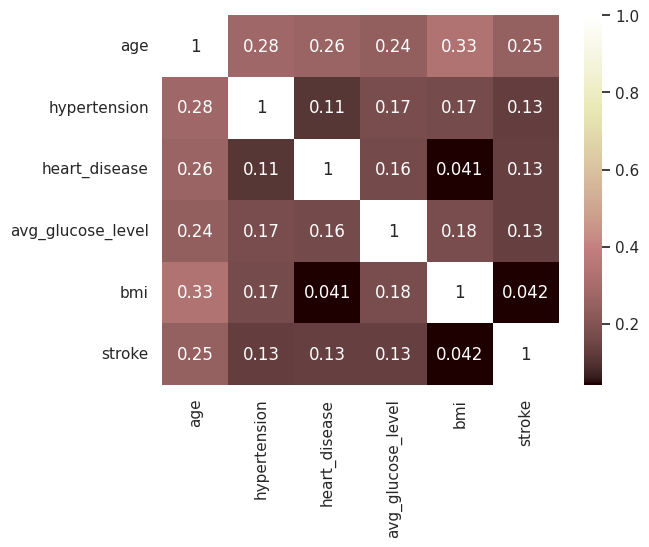

In [22]:
# Extract numerical data
numerical_data = data.select_dtypes(include=['int', 'float'])

# Drop the "id" column if it exists
numerical_data = numerical_data.drop(columns=['id','intercept'], errors='ignore')

# Calculate correlation matrix
correlation_matrix = numerical_data.corr()

# Create heatmap with shades of pink palette
sns.heatmap(correlation_matrix, annot=True, cmap='pink')
plt.show()

The highest correlation value with stroke is age : 0.25

Variable Age has the highest correlation value with the other variables

-----------------------------------------------------------------------------------------

<p style ="font-size:18px"> Dans un second temps, on effectue un prétraitement des données. On supprime les données manquantes, on supprime la colonne id qui ne nous intéresse pas et on encode les données non numériques.</p>

**Activité2**:



1.   Vérifier s'il y des valeurs manquantes dans ce dataset
2.   Afficher le tableau des valeurs manquantes



In [23]:
# Display duplicate rows
duplicate_rows = data[data.duplicated()]

print(duplicate_rows)

Empty DataFrame
Columns: [id, gender, age, hypertension, heart_disease, ever_married, work_type, Residence_type, avg_glucose_level, bmi, smoking_status, stroke, intercept]
Index: []


No duplicates inside the dataset

In [24]:
# check for missing values:
data.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
intercept              0
dtype: int64

# **Imputation**

In [25]:
print(f'Mean of non-missing Age column in training dataset: {data["bmi"].mean():.1f}')

Mean of non-missing Age column in training dataset: 28.9


In [6]:
from sklearn.impute import SimpleImputer

# Separate data into train and test based on the presence of null values in the 'bmi' column
train_with_bmi = data[data['bmi'].notnull()]
test_without_bmi = data[data['bmi'].isnull()]

# Train data (rows with non-null values of the column 'bmi')
X_train = train_with_bmi.drop(columns=['bmi'])  # Features excluding 'bmi'
y_train = train_with_bmi['bmi']  # Target variable 'bmi'

# Test data (rows with null values of the column 'bmi')
X_test = test_without_bmi.drop(columns=['bmi'])  # Features excluding 'bmi'

# Initialize SimpleImputer
imputer = SimpleImputer(strategy='mean')

# Fit and transform the imputer on the entire dataset
imputed_data = imputer.fit_transform(data[['bmi']])

# Update the 'bmi' column in the original dataset with imputed values
data['bmi'] = imputed_data


In [27]:
print(f'Mean of non-missing Age column in training dataset: {data["bmi"].mean():.1f}')

Mean of non-missing Age column in training dataset: 28.9


In [28]:
# check for missing values:
data.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
intercept            0
dtype: int64

No longer have missing values for column BMI, and the mean value of this column is the same avter the imputation

=>  we handled missing values successfully without dropping any rows and by preserving the valuable data

# **Scaling and transforming numerical data**

In [7]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# Function to handle outliers based on the Z-score method
def detect_and_handle_outliers_zscore(data):
    # Identify numeric features, excluding 'stroke'
    numeric_features = data.select_dtypes(include=['float', 'int']).columns
    column_to_exclude = 'stroke'
    numeric_features = numeric_features.drop(column_to_exclude, errors='ignore')

    for feature in numeric_features:
        mean = data[feature].mean()
        std = data[feature].std()
        z_scores = np.abs((data[feature] - mean) / std)
        threshold = 3
        outliers_mask = z_scores > threshold

        # Replace outliers with median
        median = data[feature].median()
        data.loc[outliers_mask, feature] = median

    return data

# Data preprocessing pipeline function
def data_preprocessing_pipeline(data):
    # Detect and handle outliers using z-scores
    data = detect_and_handle_outliers_zscore(data)

    # Identify numeric and categorical features
    numeric_features = data.select_dtypes(include=['float', 'int']).columns
    categorical_features = data.select_dtypes(include=['object']).columns

    # Exclude one column of your choice (e.g., 'stroke')
    column_to_exclude = 'stroke'
    numeric_features = numeric_features.drop(column_to_exclude, errors='ignore')

    # Normalize numeric features
    scaler = StandardScaler()
    data[numeric_features] = scaler.fit_transform(data[numeric_features])

    return data

# Example usage:
# Assuming 'data' is your DataFrame
cleaned_data = data_preprocessing_pipeline(data)

print("Preprocessed Data:")
print(cleaned_data.head())


Preprocessed Data:
         id  gender       age  hypertension  heart_disease ever_married  \
0 -1.298312    Male  1.051434           0.0            0.0          Yes   
1  0.716371  Female  0.786070           0.0            0.0          Yes   
2 -0.255478    Male  1.626390           0.0            0.0          Yes   
3  1.118363  Female  0.255342           0.0            0.0          Yes   
4 -1.647136  Female  1.582163           0.0            0.0          Yes   

       work_type Residence_type  avg_glucose_level       bmi   smoking_status  \
0        Private          Urban           2.887942  1.157166  formerly smoked   
1  Self-employed          Rural           2.271602  0.049470     never smoked   
2        Private          Rural           0.030386  0.567871     never smoked   
3        Private          Urban           1.550521  0.840959           smokes   
4  Self-employed          Rural           1.617788 -0.653836     never smoked   

   stroke  
0       1  
1       1  
2      

In [8]:
data = pd.DataFrame(cleaned_data)

In [9]:
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,-1.298312,Male,1.051434,0.0,0.0,Yes,Private,Urban,2.887942,1.157166,formerly smoked,1
1,0.716371,Female,0.786070,0.0,0.0,Yes,Self-employed,Rural,2.271602,0.049470,never smoked,1
2,-0.255478,Male,1.626390,0.0,0.0,Yes,Private,Rural,0.030386,0.567871,never smoked,1
3,1.118363,Female,0.255342,0.0,0.0,Yes,Private,Urban,1.550521,0.840959,smokes,1
4,-1.647136,Female,1.582163,0.0,0.0,Yes,Self-employed,Rural,1.617788,-0.653836,never smoked,1


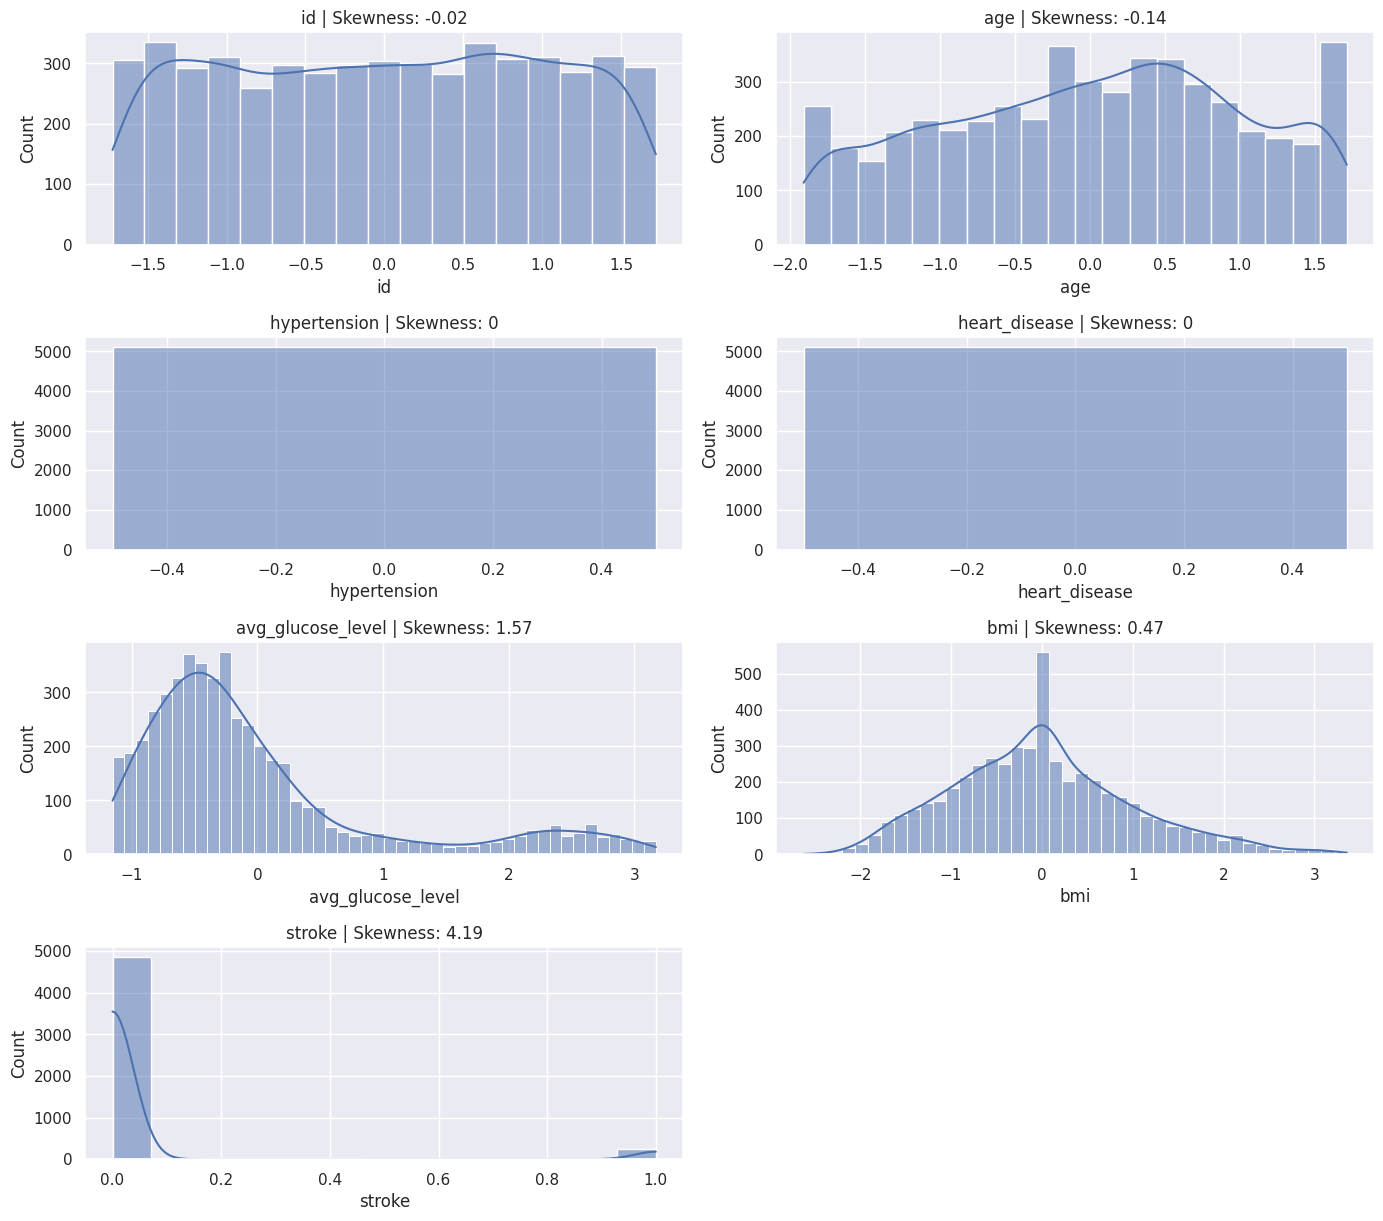

In [57]:
# Set Seaborn style
sns.set_style("darkgrid")

# Identify numerical columns
numerical_columns = data.select_dtypes(include=["int64", "float64"]).columns

# Plot distribution of each numerical feature
plt.figure(figsize=(14, len(numerical_columns) * 3))
for idx, feature in enumerate(numerical_columns, 1):
    plt.subplot(len(numerical_columns), 2, idx)
    sns.histplot(data[feature], kde=True)
    plt.title(f"{feature} | Skewness: {round(data[feature].skew(), 2)}")

# Adjust layout and show plots
plt.tight_layout()
plt.show()

**The data is no longer skewed after scaling**

In [10]:
data=data.drop(['id'],axis=1) #Suppression de la colonne id

from sklearn.preprocessing import LabelEncoder #Pour encoder les variables non numériques
le=LabelEncoder() #On fait un encodage par label

#On encode les colonnes non numériques
data['gender']=le.fit_transform(data['gender'])
data['ever_married']=le.fit_transform(data['ever_married'])
data['work_type']=le.fit_transform(data['work_type'])
data['Residence_type']=le.fit_transform(data['Residence_type'])
data['smoking_status']=le.fit_transform(data['smoking_status'])
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,1.051434,0.0,0.0,1,2,1,2.887942,1.157166,1,1
1,0,0.786070,0.0,0.0,1,3,0,2.271602,0.049470,2,1
2,1,1.626390,0.0,0.0,1,2,0,0.030386,0.567871,2,1
3,0,0.255342,0.0,0.0,1,2,1,1.550521,0.840959,3,1
4,0,1.582163,0.0,0.0,1,3,0,1.617788,-0.653836,2,1


In [113]:
data=data.drop(['intercept'],axis=1) #Suppression de la colonne id

In [11]:
from imblearn.over_sampling import RandomOverSampler

# Assuming 'data' is your DataFrame and 'stroke' is your target variable
X = data.drop(columns=['stroke'])
y = data['stroke']

# Initialize the oversampler
ros = RandomOverSampler(random_state=42)

# Resample the dataset
X_resampled, y_resampled = ros.fit_resample(X, y)

# Combine resampled features and target into a new DataFrame
resampled_data = pd.concat([X_resampled, y_resampled], axis=1)

print("Resampled Data (Oversampling):")
print(resampled_data['stroke'].value_counts())


Resampled Data (Oversampling):
stroke
1    4861
0    4861
Name: count, dtype: int64


In [12]:
data = pd.DataFrame(resampled_data)

In [13]:
y=data['stroke'] #Labels
x=data.drop('stroke',axis=1) #Features

<p style ="font-size:18px"> On regarde la distribution des labels.</p>

Text(0.5, 1.0, 'Répartitions des Labels')

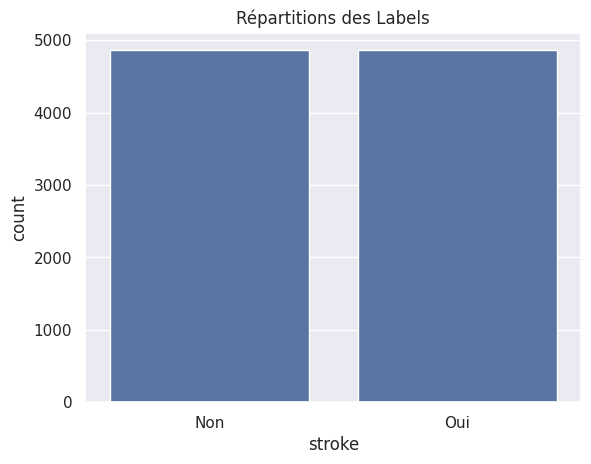

In [117]:

import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x= 'stroke', data= data)
plt.xticks([0,1],['Non','Oui'])
plt.title('Répartitions des Labels')

<p style ="font-size:18px"> On voit que l'on a peu de données "oui" (le cas où une personne a fait AVC). Il faudra donc faire attention à l'interprétation des résultats et aux données quand on les divisera en jeu d'apprentissage et un jeu de test. Nécessité de réechantillonage.</p>

<br>

<p style ="font-size:18px">Maintenant séparons les données en train_set et test_set. </p>


In [14]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split (x,y,test_size=0.2)

In [15]:
from sklearn.linear_model import Perceptron

ppn = Perceptron(max_iter=40,tol=0.001,eta0=1)  #eta0 est le learning rate c'est epsilon
#tol est le seuil minimum de stopping criteria si (tol +loss) > prevloss exit : on ne permet pas que loss grandit plus que le seuil tol
#score Return the mean accuracy on the given test data and labels.
ppn.fit(x_train, y_train)

y_pred = ppn.predict(x_test)
score = ppn.score(x_test,y_test)
print(score)

0.625706940874036


In [16]:
print ("évaluation du Perceptron")
from sklearn.metrics import classification_report
print (classification_report(y_test, y_pred))

évaluation du Perceptron
              precision    recall  f1-score   support

           0       0.58      0.88      0.70       970
           1       0.75      0.38      0.50       975

    accuracy                           0.63      1945
   macro avg       0.67      0.63      0.60      1945
weighted avg       0.67      0.63      0.60      1945



# **Cross-Validation**

In [17]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

# Initialize cross-validation strategy (e.g., Stratified K-Fold)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation
scores = cross_val_score(ppn, x, y, cv=cv, scoring='accuracy')

# Print cross-validation scores
print("Cross-Validation Scores:", scores)
print("Mean Accuracy:", scores.mean())


Cross-Validation Scores: [0.64421594 0.74395887 0.75514403 0.51440329 0.73302469]
Mean Accuracy: 0.6781493647317698


### **The accuracy has increased after using Cross Validation by 5%**

In [18]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split (x,y,test_size=0.2)

In [19]:
ppn.fit(x_train, y_train)

y_pred = ppn.predict(x_test)
score = ppn.score(x_test,y_test)
print(score)

0.7362467866323907


In [20]:
print ("évaluation du Perceptron")
from sklearn.metrics import classification_report
print (classification_report(y_test, y_pred))

évaluation du Perceptron
              precision    recall  f1-score   support

           0       0.91      0.51      0.65       947
           1       0.67      0.95      0.79       998

    accuracy                           0.74      1945
   macro avg       0.79      0.73      0.72      1945
weighted avg       0.79      0.74      0.72      1945



**cross validation enhanced the precision of the 0 values but dropped the precision of 1 values

dropped the recall of 0 values but enhanced the recall of 1 values

enhanced the f1 score of 1 values and dropped the f1 score of 0 values

it is difficult to determine whether the cross validation has enhanced the overall performance of the model or not  **

In [21]:
import tensorflow as tf

nn=tf.keras.Sequential() #On crée notre architecture

nn.add(tf.keras.layers.Dense(units=8, activation='relu')) #On ajoute une couche de 8 neurones cachés

nn.add(tf.keras.layers.Dense(units=5, activation='relu')) #On ajoute une couche de 5 neurones cachés

nn.add(tf.keras.layers.Dense(units=2, activation='relu')) #On ajoute une couche de 2 neurones cachés

nn.add(tf.keras.layers.Dense(units=1, activation='sigmoid')) #Couche de sortie

nn.compile('adam','binary_crossentropy',metrics=['accuracy'])
#On crée le modèle avec les paramètres comme la fonctions de perte ou la métrique utilisées... .


<p style ="font-size:18px"> On a donc un PMC avec 3 couches cachées, une de 8, 5 et 2. Maintenant on entraine notre modèle sur l'ensemble d'apprentissage. Le paramètre batch size correspond au nombre d'échantillons traité avant de mettre à jour le modèle. Le paramètre epochs correspond au nombre de fois que l'on traite le jeu d'entrainement.</p>

<p style ="font-size:18px"> On traite 3 fois les données d'entraînement, en modifiant le modèle à chaque passage.</p>

In [23]:
from tensorflow.keras.callbacks import EarlyStopping

# Define EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

history = nn.fit(x_train,y_train,epochs=3,batch_size=1,verbose=1, validation_data=(x_test, y_test), callbacks=[early_stopping]) #On entraine notre modèle verboze permet d'afficher le détail des epochs

Epoch 1/3
7777/7777 [==============================] - 26s 3ms/step - loss: 0.5746 - accuracy: 0.7319 - val_loss: 0.5168 - val_accuracy: 0.7681
Epoch 2/3
7777/7777 [==============================] - 19s 2ms/step - loss: 0.5054 - accuracy: 0.7743 - val_loss: 0.4936 - val_accuracy: 0.7645
Epoch 3/3
7777/7777 [==============================] - 19s 2ms/step - loss: 0.4920 - accuracy: 0.7756 - val_loss: 0.4858 - val_accuracy: 0.7738


<p style ="font-size:18px"> On voit dès le premier passage que le modèle ne change plus et que nous avons une précision de 95% sur le train set. Regardons maintenant le résultat sur le test set.</p>

In [29]:
 #Pour les résultats sur le test set
y_pred=nn.predict(x_test)
y_pred


61/61 [==============================] - 0s 2ms/step


array([[0.5311538 ],
       [0.12352952],
       [0.5170804 ],
       ...,
       [0.12352952],
       [0.49283615],
       [0.12352952]], dtype=float32)

In [30]:
from sklearn.metrics import confusion_matrix
MonTableau_bin_y_pred=[]
for i in nn.predict(x_test):
    if i>0.5:
        MonTableau_bin_y_pred.append(1)
    if i<0.5:
        MonTableau_bin_y_pred.append(0)

print("Matrice de confusion : \n",confusion_matrix(y_test,MonTableau_bin_y_pred))

from sklearn.metrics import accuracy_score
print("Accuracy de notre réseau de neurone est : ",accuracy_score(y_test,MonTableau_bin_y_pred))

61/61 [==============================] - 0s 3ms/step
Matrice de confusion : 
 [[684 263]
 [177 821]]
Accuracy de notre réseau de neurone est :  0.7737789203084833


In [31]:
print (classification_report(y_test, MonTableau_bin_y_pred))

              precision    recall  f1-score   support

           0       0.79      0.72      0.76       947
           1       0.76      0.82      0.79       998

    accuracy                           0.77      1945
   macro avg       0.78      0.77      0.77      1945
weighted avg       0.78      0.77      0.77      1945



Sequential gave better values in terms of accuracy, precisio,n recall and f1 score

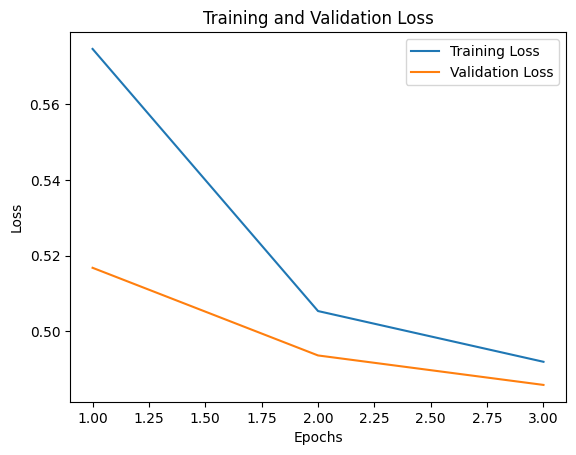

In [34]:

from tensorflow.keras.callbacks import EarlyStopping
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt

# Plot the training and validation losses
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = np.arange(1, len(loss) + 1)

plt.plot(epochs, loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Both curves decreasing indicates that the model is improving over time. If they both decrease and get close to each other but the validation loss remains lower than the training loss, it may suggest that the training set contains more noise or is more challenging than the validation set.

No overfitting

# **PS: I had better precision, recall and accuracy values after using resampling and cross validation than the original notebook but I kept your notes **

<p style ="font-size:18px"> Analysons la matrice de confusion. On voit que sur 981 données notre réseau donne non pour l'AVC, 947 fois de manière correcte et 35 fois en se trompant.</p>
<br>

<p style ="font-size:18px"> Au vu de la répartition des labels (beaucoup dAVC), on voit que le modèle peut toujours renvoyer non et presque jamais se tromper. </p>
<br>

<p style ="font-size:18px">On obtient donc 96% de précision sur le test_set, on a une bonne précision mais un modèle mauvais car il ne détecte pas les AVC, il a sur appris les données d'entrainement essentiellement composé de non AVC .</p>

<br>

<p style ="font-size:18px"> Pour qu'un réseau de neurones apprenne correctement, il faut beaucoup de données et que celles-ci soient bien réparties (dataset balancé). </p>

[[769 178]
 [ 62 936]]


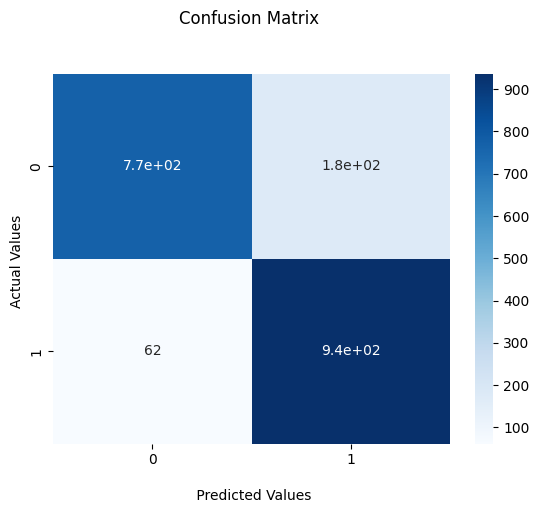

In [35]:
import seaborn as sns

#training SVC
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
svc = SVC(C=100, kernel = 'rbf', probability=True).fit(x_train, y_train)
y_pred = svc.predict(x_test)
y_pred_proba = svc.predict_proba(x_test)[:,1]

cm = confusion_matrix(y_test, y_pred)

print (cm)
tn, fp, fn, tp = cm.ravel()
ax=sns.heatmap(cm, annot=True,cmap='Blues')
ax.set_title('Confusion Matrix \n\n');
ax.set_xlabel('\n Predicted Values')
ax.set_ylabel('Actual Values ');

In [36]:
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, precision_score,roc_auc_score
f1 = f1_score(y_test, y_pred, average='macro')
auc = roc_auc_score(y_test, y_pred_proba)
precision = precision_score(y_test, y_pred)

print('F1 Score : %.2f' % f1)
print('AUC ROC : %.2f' % auc)
print('Precision : %.2f' % precision)
print ("Rapport d évaluation en détail")
print (classification_report(y_test, y_pred))

F1 Score : 0.88
AUC ROC : 0.93
Precision : 0.84
Rapport d évaluation en détail
              precision    recall  f1-score   support

           0       0.93      0.81      0.87       947
           1       0.84      0.94      0.89       998

    accuracy                           0.88      1945
   macro avg       0.88      0.87      0.88      1945
weighted avg       0.88      0.88      0.88      1945



### **SVC is the best performing model for now**

# **ROC Curve**

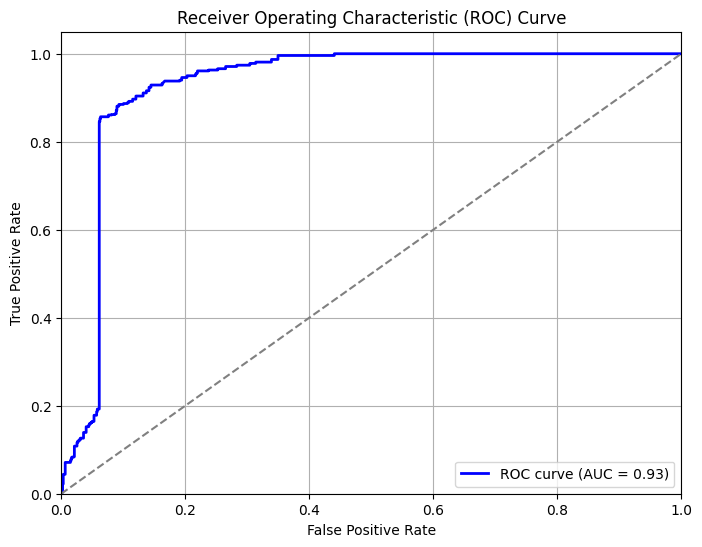

In [37]:
from sklearn.metrics import roc_curve, auc

# Get predicted probabilities for the positive class
y_prob = svc.predict_proba(x_test)[:, 1]

# Calculate the false positive rate (FPR) and true positive rate (TPR) for different threshold values
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calculate the area under the ROC curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

AUC=0.93 means that the area under the ROC curve is 0.93, which indicates that the SVM model has performed well in distinguishing between the positive and negative classes.

**Activité3**:



1.   Démontrer ces valeurs dessus manuellement et afficher les en se basant sur TP, TN, FP, FN
2.  Interpréter ces valeurs


In [38]:
# Extract TP, TN, FP, and FN from the confusion matrix
TP = cm[1, 1]
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]

# Compute accuracy
accuracy = (TP + TN) / (TP + TN + FP + FN)

# Compute precision
precision = TP / (TP + FP)

# Compute recall
recall = TP / (TP + FN)

# Compute F1 score
f1 = 2 * (precision * recall) / (precision + recall)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.8766066838046273
Precision: 0.8402154398563735
Recall: 0.9378757515030061
F1 Score: 0.8863636363636365


In [39]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier


**Activité4**:



1.   Terminer la classification en appliquant les autres modèles

2.   Proposez d'autres métriques et comparer les différents modèles


[[778 169]
 [  0 998]]
Accuracy :  0.9131105398457584


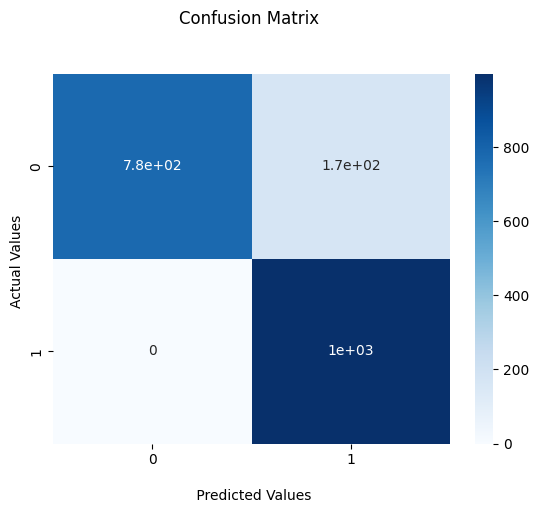

In [40]:
#training knn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
knn = KNeighborsClassifier(n_neighbors=10,weights='distance').fit(x_train, y_train)
y_pred = knn.predict(x_test)
y_pred_proba = knn.predict_proba(x_test)[:,1]

cm = confusion_matrix(y_test, y_pred)

print (cm)
tn, fp, fn, tp = cm.ravel()
ax=sns.heatmap(cm, annot=True,cmap='Blues')
ax.set_title('Confusion Matrix \n\n');
ax.set_xlabel('\n Predicted Values')
ax.set_ylabel('Actual Values ');

print("Accuracy : ",accuracy_score(y_test,y_pred))

In [41]:
f1 = f1_score(y_test, y_pred, average='macro')
auc = roc_auc_score(y_test, y_pred_proba)
precision = precision_score(y_test, y_pred)

print('F1 Score : %.2f' % f1)
print('AUC ROC : %.2f' % auc)
print('Precision : %.2f' % precision)
print ("Rapport d évaluation en détail")
print (classification_report(y_test, y_pred))

F1 Score : 0.91
AUC ROC : 0.98
Precision : 0.86
Rapport d évaluation en détail
              precision    recall  f1-score   support

           0       1.00      0.82      0.90       947
           1       0.86      1.00      0.92       998

    accuracy                           0.91      1945
   macro avg       0.93      0.91      0.91      1945
weighted avg       0.93      0.91      0.91      1945



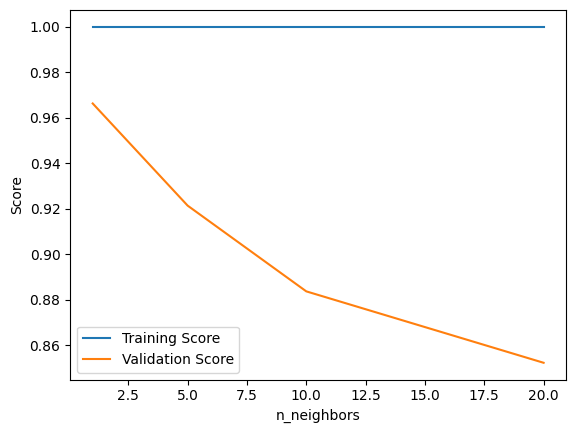

In [42]:
from sklearn.model_selection import validation_curve

# Set up parameter range
param_range = [1, 5, 10, 20]

# Compute validation curves
train_scores, valid_scores = validation_curve(knn, x_train, y_train, param_name='n_neighbors', param_range=param_range, cv=5)

# Plot validation curves
plt.plot(param_range, np.mean(train_scores, axis=1), label='Training Score')
plt.plot(param_range, np.mean(valid_scores, axis=1), label='Validation Score')
plt.xlabel('n_neighbors')
plt.ylabel('Score')
plt.legend()
plt.show()

A training score of 1 consistently across different values of n_neighbors and a decreasing validation score is a clear indication of overfitting.

[[936  11]
 [  0 998]]
Accuracy :  0.9943444730077121


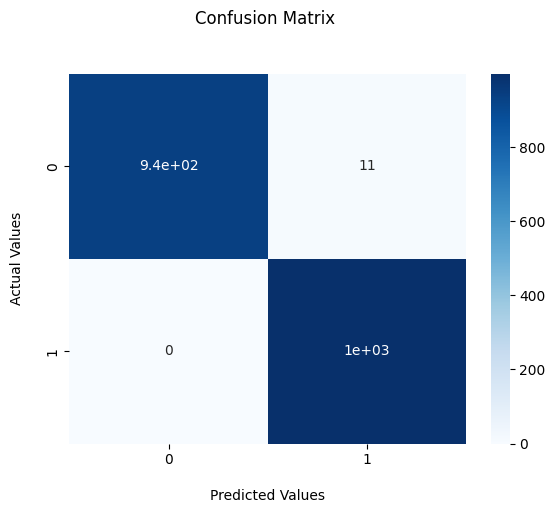

In [43]:
import seaborn as sns

# Instantiate Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf.fit(x_train, y_train)

# Make predictions
y_pred = rf.predict(x_test)
y_pred_proba = rf.predict_proba(x_test)[:, 1]

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

print(cm)

# Flatten confusion matrix
tn, fp, fn, tp = cm.ravel()

# Plot confusion matrix
ax = sns.heatmap(cm, annot=True, cmap='Blues')
ax.set_title('Confusion Matrix \n\n')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values\n')

# Calculate and print accuracy
print("Accuracy : ", accuracy_score(y_test, y_pred))

In [44]:
f1 = f1_score(y_test, y_pred, average='macro')
auc = roc_auc_score(y_test, y_pred_proba)
precision = precision_score(y_test, y_pred)

print('F1 Score : %.2f' % f1)
print('AUC ROC : %.2f' % auc)
print('Precision : %.2f' % precision)
print ("Rapport d évaluation en détail")
print (classification_report(y_test, y_pred))

F1 Score : 0.99
AUC ROC : 1.00
Precision : 0.99
Rapport d évaluation en détail
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       947
           1       0.99      1.00      0.99       998

    accuracy                           0.99      1945
   macro avg       0.99      0.99      0.99      1945
weighted avg       0.99      0.99      0.99      1945



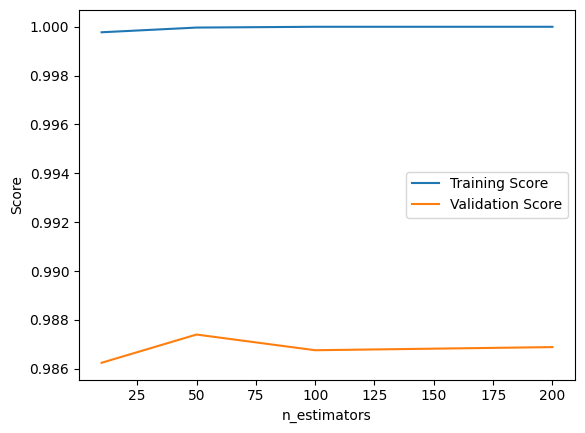

In [45]:
from sklearn.model_selection import validation_curve

param_range = [10, 50, 100, 200]
train_scores, valid_scores = validation_curve(rf, x_train, y_train, param_name='n_estimators', param_range=param_range, cv=5)

plt.plot(param_range, np.mean(train_scores, axis=1), label='Training Score')
plt.plot(param_range, np.mean(valid_scores, axis=1), label='Validation Score')
plt.xlabel('n_estimators')
plt.ylabel('Score')
plt.legend()
plt.show()


### **Also a sign of overfitting**

[[607 340]
 [159 839]]
Accuracy :  0.7434447300771209


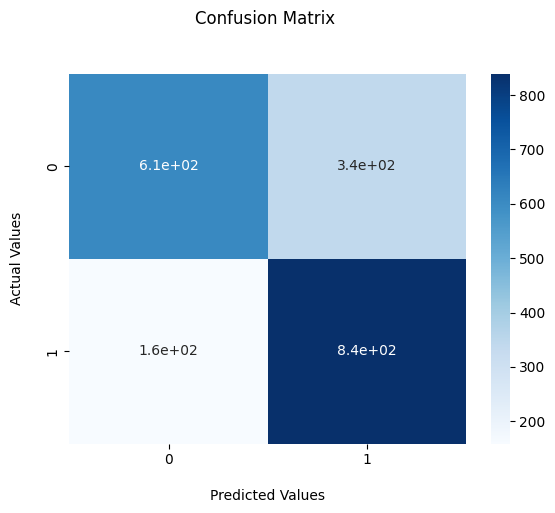

In [49]:
# Instantiate Naive Bayes Classifier
nb = GaussianNB()

# Train the model
nb.fit(x_train, y_train)

# Make predictions
y_pred = nb.predict(x_test)
y_pred_proba = nb.predict_proba(x_test)[:, 1]

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

print(cm)

# Flatten confusion matrix
tn, fp, fn, tp = cm.ravel()

# Plot confusion matrix
ax = sns.heatmap(cm, annot=True, cmap='Blues')
ax.set_title('Confusion Matrix \n\n')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values\n')

# Calculate and print accuracy
print("Accuracy : ", accuracy_score(y_test, y_pred))


In [50]:
f1 = f1_score(y_test, y_pred, average='macro')
auc = roc_auc_score(y_test, y_pred_proba)
precision = precision_score(y_test, y_pred)

print('F1 Score : %.2f' % f1)
print('AUC ROC : %.2f' % auc)
print('Precision : %.2f' % precision)
print ("Rapport d évaluation en détail")
print (classification_report(y_test, y_pred))

F1 Score : 0.74
AUC ROC : 0.81
Precision : 0.71
Rapport d évaluation en détail
              precision    recall  f1-score   support

           0       0.79      0.64      0.71       947
           1       0.71      0.84      0.77       998

    accuracy                           0.74      1945
   macro avg       0.75      0.74      0.74      1945
weighted avg       0.75      0.74      0.74      1945



[[687 260]
 [200 798]]
Accuracy :  0.7634961439588689


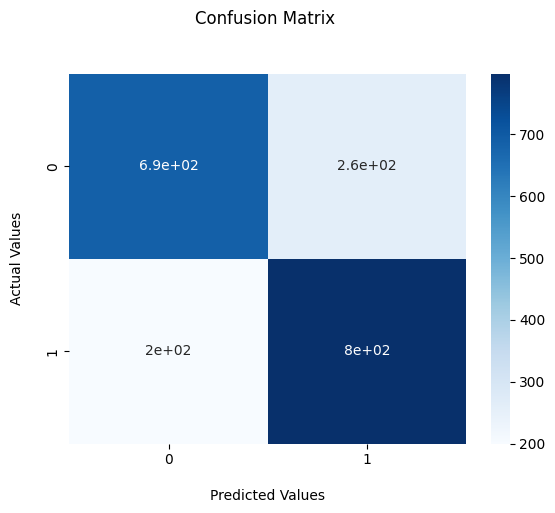

In [51]:
from sklearn.linear_model import LogisticRegression


# Instantiate Logistic Regression Classifier
lr = LogisticRegression()

# Train the model
lr.fit(x_train, y_train)

# Make predictions
y_pred = lr.predict(x_test)
y_pred_proba = lr.predict_proba(x_test)[:, 1]

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

print(cm)

# Flatten confusion matrix
tn, fp, fn, tp = cm.ravel()

# Plot confusion matrix
ax = sns.heatmap(cm, annot=True, cmap='Blues')
ax.set_title('Confusion Matrix \n\n')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values\n')

# Calculate and print accuracy
print("Accuracy : ", accuracy_score(y_test, y_pred))


In [52]:
f1 = f1_score(y_test, y_pred, average='macro')
auc = roc_auc_score(y_test, y_pred_proba)
precision = precision_score(y_test, y_pred)

print('F1 Score : %.2f' % f1)
print('AUC ROC : %.2f' % auc)
print('Precision : %.2f' % precision)
print ("Rapport d évaluation en détail")
print (classification_report(y_test, y_pred))

F1 Score : 0.76
AUC ROC : 0.84
Precision : 0.75
Rapport d évaluation en détail
              precision    recall  f1-score   support

           0       0.77      0.73      0.75       947
           1       0.75      0.80      0.78       998

    accuracy                           0.76      1945
   macro avg       0.76      0.76      0.76      1945
weighted avg       0.76      0.76      0.76      1945



# **Conclusion: SVC is the most performing model  **